# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bennyantony/nltk_data...


In [4]:
# Read your api key environment variable
# Load .env enviroment variables
load_dotenv()

#now get the news API key from the .env file
newsapi_key = os.getenv("newsapi_key")


In [5]:

from newsapi import NewsApiClient
# Create a newsapi client
newsapi = NewsApiClient(api_key=newsapi_key)

In [13]:
# Fetch the Bitcoin news articles
all_bitcoin_articles = newsapi.get_everything(q='bitcoin',
                                             language="en",
                                            page_size=100,
                                            sort_by="relevancy")


print(f"Total articles about Bitcoin: {all_bitcoin_articles['totalResults']}")

Total articles about Bitcoin: 10773


In [14]:
# Fetch the Ethereum news articles
all_ethereum_articles = newsapi.get_everything(q='ethereum',
                                            language="en",
                                            page_size=100,
                                            sort_by="relevancy")

print(f"Total articles about Ethereum: {all_ethereum_articles['totalResults']}")

Total articles about Ethereum: 4300


In [21]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_senti = []

for article in all_bitcoin_articles["articles"]:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_senti.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
df_bitcoin = pd.DataFrame(bitcoin_senti)
df_bitcoin.head()


,compound,date,negative,neutral,positive,text
0,0.3818,2021-05-12,0.00,0.929,0.071,Just weeks after Tesla started accepting Bitco...
1,0.2960,2021-05-07,0.00,0.942,0.058,Shares of Square are up more than 6% today aft...
2,0.0000,2021-04-27,0.00,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...
3,0.7506,2021-04-20,0.00,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
4,0.4939,2021-05-12,0.05,0.816,0.134,Image: Tesla\r\n\n \n\n Tesla has stopped acce...


In [22]:
# Create the Ethereum sentiment scores DataFrame
ethereum_senti = []

for article in all_ethereum_articles["articles"]:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_senti.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
df_ethereum = pd.DataFrame(ethereum_senti)
df_ethereum.head()

,compound,date,negative,neutral,positive,text
0,0.2263,2021-05-12,0.00,0.940,0.060,"Vitalik Buterin, the creator of Ethereum, on W..."
1,-0.4019,2021-05-04,0.15,0.778,0.072,Their investors call them disruptive innovator...
2,0.7506,2021-04-20,0.00,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
3,0.0258,2021-04-20,0.00,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...
4,0.4019,2021-05-15,0.00,0.917,0.083,Solana isn’t known yet outside of the crypto c...


In [23]:
# Describe the Bitcoin Sentiment
df_bitcoin.describe()

,compound,negative,neutral,positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.124340,0.034480,0.899030,0.066520
std,0.392952,0.048393,0.087723,0.073219
min,-0.726900,0.000000,0.662000,0.000000
25%,0.000000,0.000000,0.837500,0.000000
50%,0.000000,0.000000,0.907500,0.057500
75%,0.421500,0.068500,1.000000,0.108000
max,0.845500,0.219000,1.000000,0.275000


In [24]:
# Describe the Ethereum Sentiment
df_ethereum.describe()

,compound,negative,neutral,positive
count,100.000000,100.000000,100.000000,100.00000
mean,0.133908,0.025920,0.914370,0.05971
std,0.367237,0.050516,0.078769,0.06712
min,-0.918600,0.000000,0.694000,0.00000
25%,0.000000,0.000000,0.854000,0.00000
50%,0.038700,0.000000,0.927000,0.04700
75%,0.426225,0.047250,1.000000,0.09200
max,0.827100,0.289000,1.000000,0.25600


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin(0.066520) has highest score compared to Ethereum(0.05971)

Q: Which coin had the highest compound score?

A: Bitcoin(0.845500) has highest score compared to Ethereum(0.827100)

Q. Which coin had the highest positive score?

A: Bitcoin(0.275000) has highest score compared to Ethereum(0.25600)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [28]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
#print(sw)
# Expand the default stopwords list if necessary
new_stopwords={'moon','also','dip'}

#create the new stopwords list
sw_new = sw.union(new_stopwords)
print(sw_new)

{'couldn', 'through', 'his', "you'll", 'doesn', 'at', "wasn't", 'again', 'can', 'should', 'been', "that'll", "hasn't", "shan't", 'we', 'mustn', 'with', 'while', 'hadn', "won't", "you'd", 'most', 'or', 'same', 'are', 'shan', 'were', 'not', 'into', 'on', 'before', 'of', 'now', "you're", 'hers', 'don', 'hasn', 'ma', 'there', 'what', "isn't", 'he', "aren't", 'and', 'over', 'up', 'does', 't', 'll', 'wasn', 'own', 'mightn', 'she', 'when', 'shouldn', 'which', 'whom', 'to', 'itself', 'didn', 'against', 'after', "didn't", "shouldn't", 'the', 'themselves', 'this', 'all', 'had', "couldn't", 'out', 'such', 'y', 'for', 'why', "should've", "hadn't", 'those', 'herself', "it's", 'during', 'both', 'wouldn', 'also', 'too', 'other', "don't", "mustn't", 'do', 'him', 'ourselves', 'o', 'then', 're', 'our', 'because', 'was', 'have', 'any', 'who', 'has', 'her', 'my', 'needn', 'them', 'weren', 'its', 'an', "needn't", 'aren', 'won', 'having', 'm', 'until', 'than', 'that', 'doing', 'yourselves', 'if', 'ours', 'h

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

In [30]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    

    # Remove the punctuation from text
    #use regular expression to remove the punctuations
    tokenizer = nltk.RegexpTokenizer(r"\w+")

    # Create a tokenized list of the words
    words = tokenizer.tokenize(text)

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    #combine both of them together
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw_new]
    
    return tokens

In [31]:
# Create a new tokens column for Bitcoin
df_bitcoin['tokens'] = df_bitcoin['text'].apply(tokenizer)
df_bitcoin.head()

,compound,date,negative,neutral,positive,text,tokens
0,0.3818,2021-05-12,0.00,0.929,0.071,Just weeks after Tesla started accepting Bitco...,"[week, tesla, started, accepting, bitcoin, cur..."
1,0.2960,2021-05-07,0.00,0.942,0.058,Shares of Square are up more than 6% today aft...,"[shares, square, 6, today, american, fintech, ..."
2,0.0000,2021-04-27,0.00,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...,"[tesla, relationship, bitcoin, dalliance, acco..."
3,0.7506,2021-04-20,0.00,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
4,0.4939,2021-05-12,0.05,0.816,0.134,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,"[image, tesla, tesla, ha, stopped, accepting, ..."


In [32]:
# Create a new tokens column for Ethereum
df_ethereum['tokens'] = df_ethereum['text'].apply(tokenizer)
df_ethereum.head()

,compound,date,negative,neutral,positive,text,tokens
0,0.2263,2021-05-12,0.00,0.940,0.060,"Vitalik Buterin, the creator of Ethereum, on W...","[vitalik, buterin, creator, ethereum, wednesda..."
1,-0.4019,2021-05-04,0.15,0.778,0.072,Their investors call them disruptive innovator...,"[investor, call, disruptive, innovator, detrac..."
2,0.7506,2021-04-20,0.00,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
3,0.0258,2021-04-20,0.00,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...,"[venmo, jumping, aboard, cryptocurrency, bandw..."
4,0.4019,2021-05-15,0.00,0.917,0.083,Solana isn’t known yet outside of the crypto c...,"[solana, known, yet, outside, crypto, communit..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [33]:
from collections import Counter
from nltk import ngrams

In [36]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(df_bitcoin.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(25)))

{('elon', 'musk'): 25, ('char', 'reuters'): 12, ('reuters', 'staff'): 11, ('char', 'bitcoin'): 9, ('currency', 'bitcoin'): 8, ('new', 'york'): 7, ('virtual', 'currency'): 7, ('illustration', 'taken'): 7, ('reuters', 'dado'): 7, ('tesla', 'inc'): 7, ('accepting', 'bitcoin'): 6, ('char', 'tesla'): 6, ('tesla', 'ha'): 6, ('2021', 'reuters'): 6, ('dado', 'ruvic'): 6, ('record', 'high'): 6, ('ceo', 'elon'): 5, ('char', 'representation'): 5, ('representation', 'virtual'): 5, ('seen', 'front'): 5, ('purchase', 'vehicle'): 5, ('ha', 'suspended'): 5, ('file', 'photo'): 5, ('char', 'cryptocurrency'): 4, ('fossil', 'fuel'): 4}


In [37]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(df_ethereum.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(bitcoin_ngrams.most_common(25)))

{('elon', 'musk'): 25, ('char', 'reuters'): 12, ('reuters', 'staff'): 11, ('char', 'bitcoin'): 9, ('currency', 'bitcoin'): 8, ('new', 'york'): 7, ('virtual', 'currency'): 7, ('illustration', 'taken'): 7, ('reuters', 'dado'): 7, ('tesla', 'inc'): 7, ('accepting', 'bitcoin'): 6, ('char', 'tesla'): 6, ('tesla', 'ha'): 6, ('2021', 'reuters'): 6, ('dado', 'ruvic'): 6, ('record', 'high'): 6, ('ceo', 'elon'): 5, ('char', 'representation'): 5, ('representation', 'virtual'): 5, ('seen', 'front'): 5, ('purchase', 'vehicle'): 5, ('ha', 'suspended'): 5, ('file', 'photo'): 5, ('char', 'cryptocurrency'): 4, ('fossil', 'fuel'): 4}


In [42]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [43]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed,10)
print(bitcoin_top10)

[('char', 100), ('bitcoin', 86), ('reuters', 40), ('musk', 31), ('tesla', 30), ('cryptocurrency', 29), ('ha', 28), ('elon', 26), ('said', 18), ('u', 16)]


In [44]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed,10)
print(ethereum_top10)

[('char', 98), ('bitcoin', 50), ('reuters', 42), ('ethereum', 32), ('cryptocurrency', 31), ('ha', 27), ('currency', 24), ('year', 19), ('2021', 18), ('illustration', 16)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

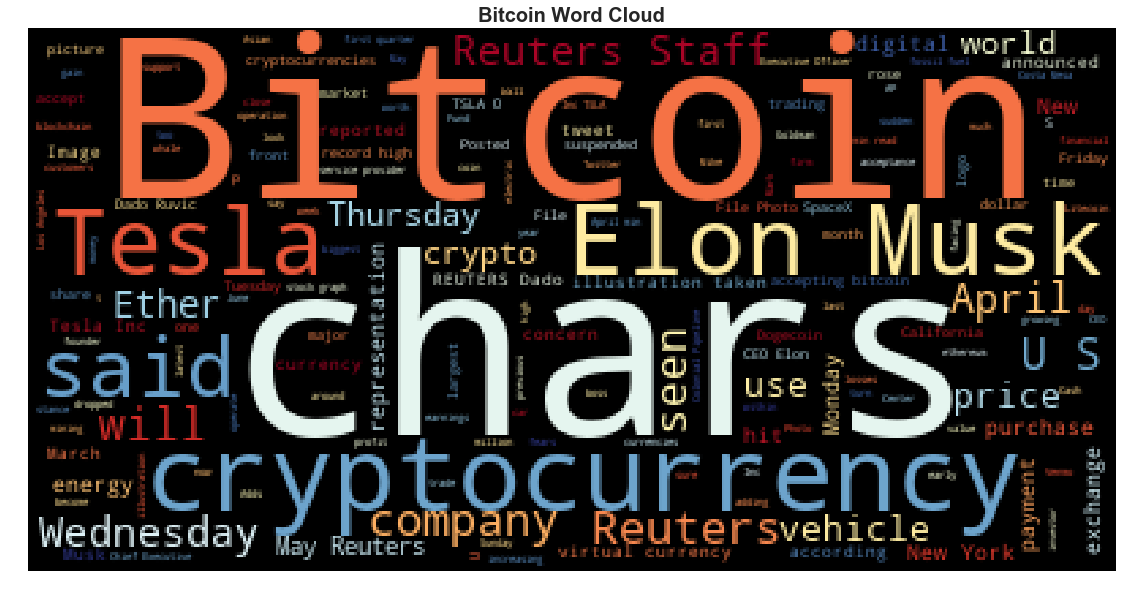

In [52]:
# Generate the Bitcoin word cloud
wordcloud_bitcoin = WordCloud(colormap="RdYlBu").generate(bitcoin_text)
plt.imshow(wordcloud_bitcoin)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

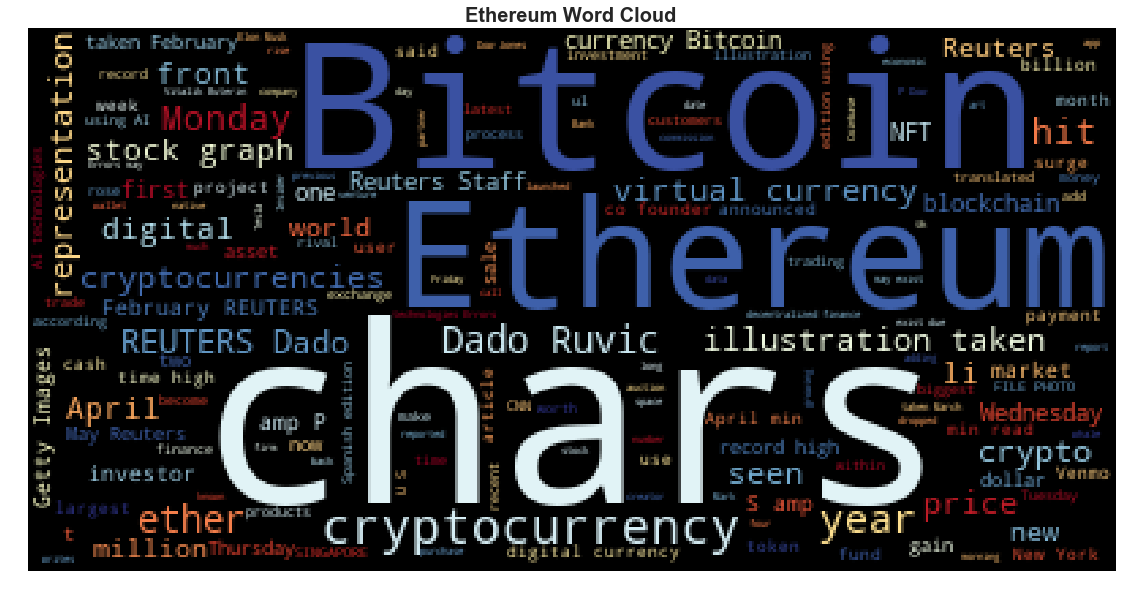

In [53]:
# Generate the Ethereum word cloud
wordcloud_ethereum = WordCloud(colormap="RdYlBu").generate(ethereum_text)
plt.imshow(wordcloud_ethereum)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [55]:
import spacy
from spacy import displacy

In [57]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 6.5 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [58]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [59]:
# Concatenate all of the Bitcoin text together
#take the "text" column from the dataframe, every row , and combine
bitcoin_text = ' '.join(df_bitcoin.text)
bitcoin_text

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars] Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars] Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars] Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars] Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consum

In [60]:

# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [63]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [64]:
# List all Entities
for entity in bitcoin_doc.ents:
    print(entity.text + ' ' + entity.label_)

Just weeks DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Tesla ORG
Elon Musk PERSON
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
Mark Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Three years DATE
Babel Finance ORG
Monday DATE
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
more than 5,500 miles QUANTITY
the United States GPE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Elon Musk PERSON
Dogecoin GPE
Twitt

---

### Ethereum NER

In [65]:
# Concatenate all of the Ethereum text together
#take the "text" column from the dataframe, every row , and combine
ethereum_text = ' '.join(df_ethereum.text)
ethereum_text

'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars] Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars] Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars] Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars] Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide va

In [66]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [67]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [68]:
# List all Entities
for entity in ethereum_doc.ents:
    print(entity.text + ' ' + entity.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
Solana PERSON
Anatoly Yakovenko PERSON
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dow Jones Indices ORG
Reuters ORG
SINGAP

---